In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Trained model on demo Image

In [21]:
# this is the github demo image 
bark_img = "bark.jpg"
bark = plt.imread(bark_img)

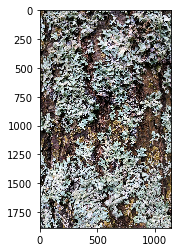

In [22]:
plt.imshow(bark)

In [27]:
demo_output_dir_1 = "outputs/out.L2,7.o4.512x512"
suffix = "_F0000.png" 

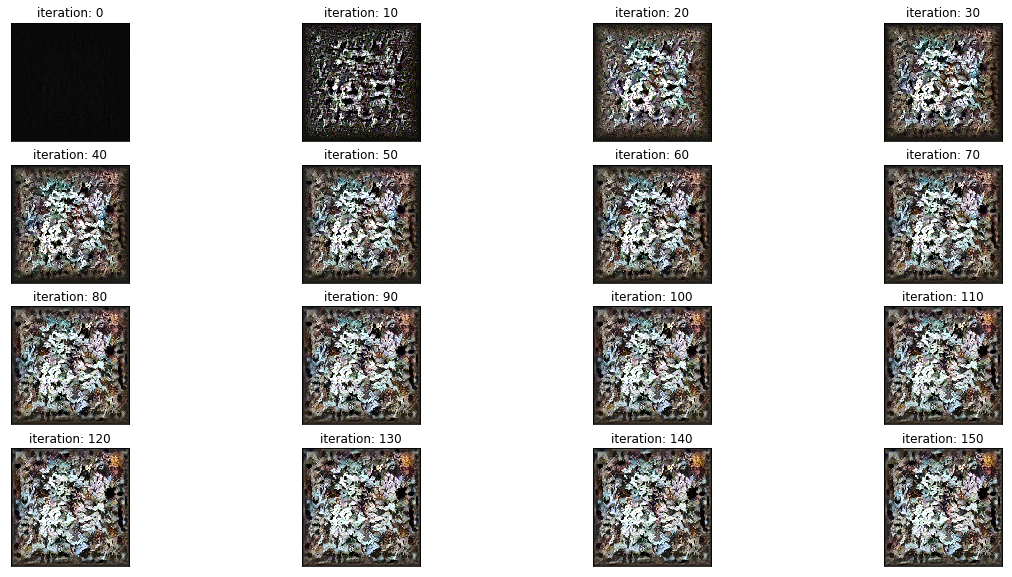

In [54]:
import os
fig = plt.figure(figsize = (20, 10))
for i in range(16):
    idx = '{:04d}'.format(i * 10)
    img = os.path.join(demo_output_dir_1, 'I{}{}'.format(idx, suffix))
    #print(img)
    img = plt.imread(img)
    fig.add_subplot(4, 4, i + 1, yticks=[], xticks=[], title = "iteration: {}".format(str(i * 10)))
    plt.imshow(img)
plt.show()

### Trained model on our images
- takes ~25 mins for ~170 iterations
- terminate the training by hand at iteration 170

In [15]:
# Nature example
example = "sun_dzqczkfbtaeaezqu.jpg"

In [19]:
example_img = plt.imread(example)

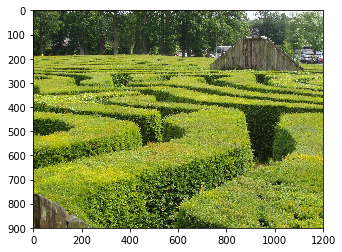

In [20]:
plt.imshow(example_img)

In [55]:
MIT_output_dir = "MIT_example/out.L2,7.o4.512x512"
suffix = "_F0000.png" 

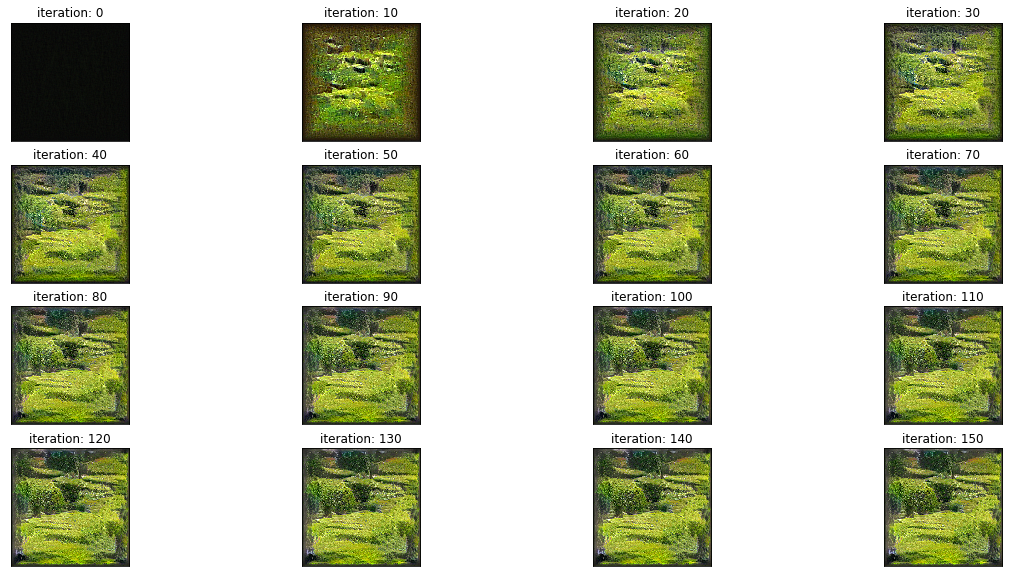

In [56]:
# visualize first 150 iterations
import os
fig = plt.figure(figsize = (20, 10))
for i in range(16):
    idx = '{:04d}'.format(i * 10)
    img = os.path.join(MIT_output_dir, 'I{}{}'.format(idx, suffix))
    #print(img)
    img = plt.imread(img)
    fig.add_subplot(4, 4, i + 1, yticks=[], xticks=[], title = "iteration: {}".format(str(i * 10)))
    plt.imshow(img)
plt.show()

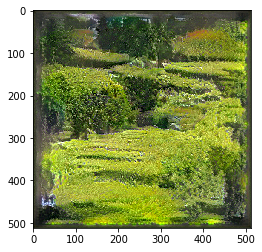

In [60]:
# cut down the algorithm at iteration 170
final = os.path.join(MIT_output_dir, "I0170_F0000.png")
final_img = plt.imread(final)
plt.imshow(final_img)

In [61]:
# Urban Example
urban_example = "16153261485_4146b8bc89_k.jpg"

In [62]:
urban_img = plt.imread(urban_example)

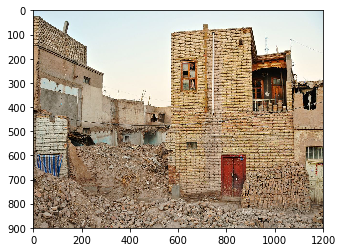

In [63]:
plt.imshow(urban_img)

In [64]:
MIT_output_dir_urban = "MIT_example_urban/out.L2,7.o4.512x512"
suffix = "_F0000.png" 

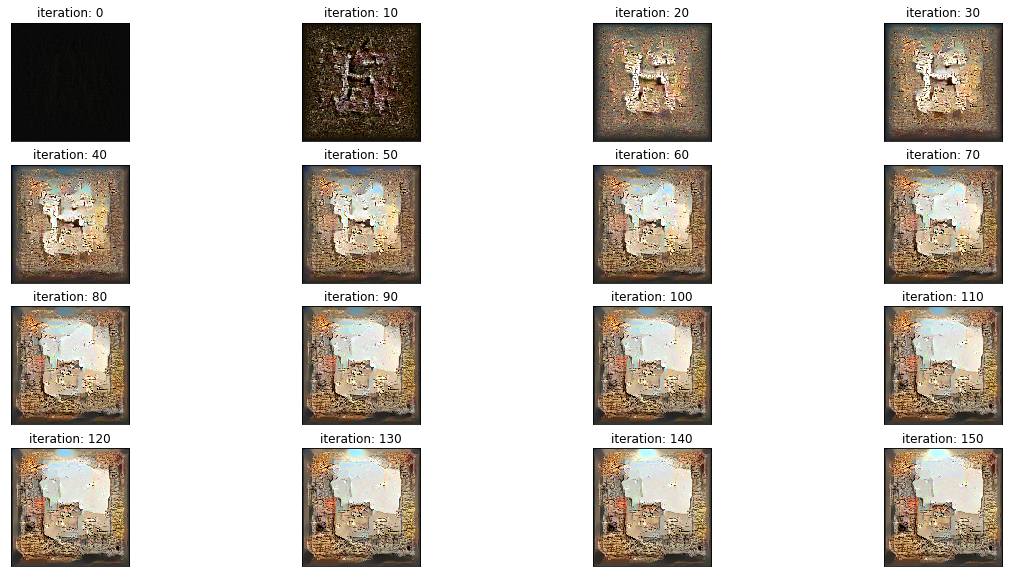

In [65]:
# visualize first 150 iterations
import os
fig = plt.figure(figsize = (20, 10))
for i in range(16):
    idx = '{:04d}'.format(i * 10)
    img = os.path.join(MIT_output_dir_urban, 'I{}{}'.format(idx, suffix))
    #print(img)
    img = plt.imread(img)
    fig.add_subplot(4, 4, i + 1, yticks=[], xticks=[], title = "iteration: {}".format(str(i * 10)))
    plt.imshow(img)
plt.show()

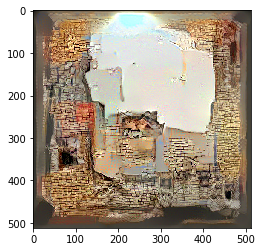

In [66]:
# cut down the algorithm at iteration 170
final = os.path.join(MIT_output_dir_urban, "I0170_F0000.png")
final_img = plt.imread(final)
plt.imshow(final_img)

### Algorithm
#### Motivation: Synthesize textures for high-resolution images
#### Intuition: Gram Matrix + Gaussian Pyramid
   - Gram Matrix: evaluate whether two different features (on a certain layer of the neural network) are activate in some similiar regions ~ evaluate the correlation between features
   - Goal is to minimize the difference between the Gram matrix of the source image and that of the synthesized image. 
   - Gaussian Pyramid: sample the image at different scale 
   - the Gram Matrix method was proposed by Gatys, and it faced the problem that, compared to a high-resolution image, the receptive fields of a CNN are small; thus the model can only synthesize textures that are "semantically significant" at a certain scale. The author of this paper introduced Gaussian Pyramid to leverages the Gram Matrix method at different scale. 
   
#### Algorithm at high level:
1. take a source image
2. randomly initialize a synthezied image
3. while not converge:
    - feed both the source image and the synthesized image into a CNN
    - extract their feature maps at each level and compute their Gram Matrices, respectively
    - compute the Frobenius distance between the Gram Matrices for the source image and those for the synthesized image; this distance is the loss we want to minimize
4. gradient descent to minimize this loss

#### Some rough thoughts about next step:
- can look into the Gram matrices (of the source images) and see if feature correlations are significantly different for nature & urban scenes
- the current model are using feature maps from all levels; if we are only interested in higher-level features, I wonder if we can try using only receptive fields at higher levels and see if it can still achieve a reasonable result. 
- can we feed the synthesized image into a trained urban/nature scene classifer and see how well the classifer does compared to its performance on "real" urban/nature images?
- It seems to me that the synthesized images capture the "essence" of the textures, but their simulation of the positional relations among these textures are relatively rough. It makes sense because the gram matrix kind of aggregate the spatial information. And I feel it might be interesting to have people rating these synthesized images in terms of nature v.s. urban as well, so that we know how important a role textures play when we perceive 